In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

In [2]:
alpha = np.arange(0,4.25,0.25)

In [3]:
disimp = []
x_diff = []
ratsum = []

for i in range(len(alpha)):
    xdis = pd.read_excel(f'Xdis3_1.025_1_0.1_mosek_{alpha[i]}.xlsx', header = [0,1] , index_col = [0])
    xbase = pd.read_excel(f'Xbase_1.025_1_0.1_mosek_{alpha[i]}.xlsx', header = [0,1] , index_col = [0])
    dimp = pd.read_excel(f'Dimp3_1.025_1_0.1_mosek_{alpha[i]}.xlsx', header = [0] , index_col = [0,1,2])
    rat = pd.read_excel(f'Rat_1.025_1_0.1_mosek_{alpha[i]}.xlsx', header = [0,1] , index_col = [0])
    
    diff = xbase - xdis
    x_diff.append(diff.sum().sum())
    disimp.append(dimp.sum().sum())
    ratsum.append(rat.sum().sum())

In [4]:
obj = pd.read_excel('results_compilation_mosek.xlsx')

In [5]:
obj

,Unnamed: 0,dis,op,ip,num_thres,termination,Objective
0,0,0.1,1.025,1,1.000000e-30,optimal,1.428955e+06
1,1,0.1,1.025,1,1.000000e-30,optimal,1.430887e+06
2,2,0.1,1.025,1,1.000000e-30,optimal,1.431001e+06
3,3,0.1,1.025,1,1.000000e-30,optimal,1.431012e+06
4,4,0.1,1.025,1,1.000000e-30,optimal,1.431012e+06
5,5,0.1,1.025,1,1.000000e-30,optimal,1.431012e+06
6,6,0.1,1.025,1,1.000000e-30,optimal,1.431012e+06
7,7,0.1,1.025,1,1.000000e-30,optimal,1.431012e+06
8,8,0.1,1.025,1,1.000000e-30,optimal,1.431012e+06
9,9,0.1,1.025,1,1.000000e-30,optimal,1.431012e+06


In [18]:
df = pd.DataFrame({
                      'alpha': alpha, 
                      'Sum(Xbase - X)': x_diff,
                      'Sum(Imports)': disimp,
                      'Ration' : ratsum,
                        'Objevtive': obj['Objective']
                    })

In [19]:
df

,alpha,Sum(Xbase - X),Sum(Imports),Ration,Objevtive
0,0.00,2057.130750,166679.849704,0,1.428955e+06
1,0.25,529.938799,1619.397108,0,1.430887e+06
2,0.50,50.654393,78.779808,0,1.431001e+06
3,0.75,2.875817,3.312793,0,1.431012e+06
4,1.00,0.001720,0.003777,0,1.431012e+06
5,1.25,-0.002204,0.000099,0,1.431012e+06
6,1.50,-0.002203,0.000096,0,1.431012e+06
7,1.75,-0.002205,0.000096,0,1.431012e+06
8,2.00,-0.002204,0.000099,0,1.431012e+06
9,2.25,-0.002204,0.000099,0,1.431012e+06


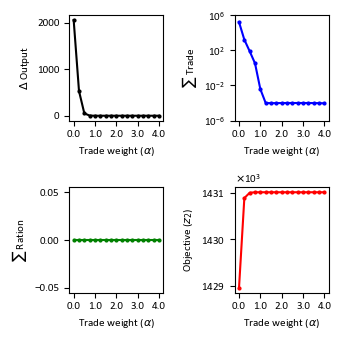

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


xticks = np.linspace(df['alpha'].min(), df['alpha'].max(), num=5)
# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(3.5,3.5))  # 2x2 layout

ylabels = [r"$\Delta$ Output", r'$\sum$ Trade', r'$\sum$ Ration', r'Objective ($z_2$)']  # Y-axis columns
color = ['k', 'b', 'g', 'r']

fontname1 = 'Calibri'
fontsize1 = 8

i = 0


for ax, col in zip(axes.flatten(), columns):
    ax.plot(df['alpha'], df[col], color = color[i], marker = 'o', markersize=2)  # Random color
    ax.set_xlabel(r"Trade weight ($\alpha$)", fontname = fontname1, fontsize = fontsize1)
    ax.set_ylabel(ylabels[i], fontname = fontname1, fontsize = fontsize1)

    if col == 'Sum(Imports)':
        ax.set_yscale("log")
        ax.set_ylim(0.000001, 1e6)
            
    ax.grid(False)
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{tick:.1f}" for tick in xticks], fontname=fontname1, fontsize=fontsize1)
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3))
    plt.gca().yaxis.get_offset_text().set_fontsize(fontsize1) 
    plt.gca().yaxis.get_offset_text().set_fontname(fontname1)
    plt.setp(ax.get_yticklabels(), fontname=fontname1, fontsize=fontsize1)
    i = i+1
    
plt.tight_layout()
plt.savefig(f'Base_alpha_sensitivity.jpeg', dpi=1200, bbox_inches='tight')